In [16]:
# ===============================================================
# 🧠 Análisis Exploratorio de Datos (EDA)
# Dataset: dataset_clasificado_hibrido_mejorado.csv
# ===============================================================

# ========================================
# 1️⃣ Librerías necesarias
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# ========================================
# 2️⃣ Cargar dataset
# ========================================
df = pd.read_csv("../output/dataset_farmacia_integrado.csv")
print("✅ Dataset cargado:", df.shape)

✅ Dataset cargado: (171864, 8)


In [17]:
# Estilo general
plt.style.use('ggplot')

## Análisis general del dataset

In [18]:
df_info = df.info()
df_describe = df.describe()
df_nulos = df.isnull().sum()
df_duplicados = df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171864 entries, 0 to 171863
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_venta         171864 non-null  int64  
 1   fecha            171864 non-null  object 
 2   total_venta      171864 non-null  float64
 3   precio_unitario  171864 non-null  float64
 4   total_unitario   171864 non-null  float64
 5   precio_compra    171864 non-null  float64
 6   nombre           171864 non-null  object 
 7   cantidad_total   171864 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 10.5+ MB


In [19]:
print("Información del dataset obtenida:")
print("Total de filas y columnas:", df.shape)
print("Número de valores nulos por columna:\n", df_nulos)
print("Número de filas duplicadas:", df_duplicados)



Información del dataset obtenida:
Total de filas y columnas: (171864, 8)
Número de valores nulos por columna:
 id_venta           0
fecha              0
total_venta        0
precio_unitario    0
total_unitario     0
precio_compra      0
nombre             0
cantidad_total     0
dtype: int64
Número de filas duplicadas: 3379


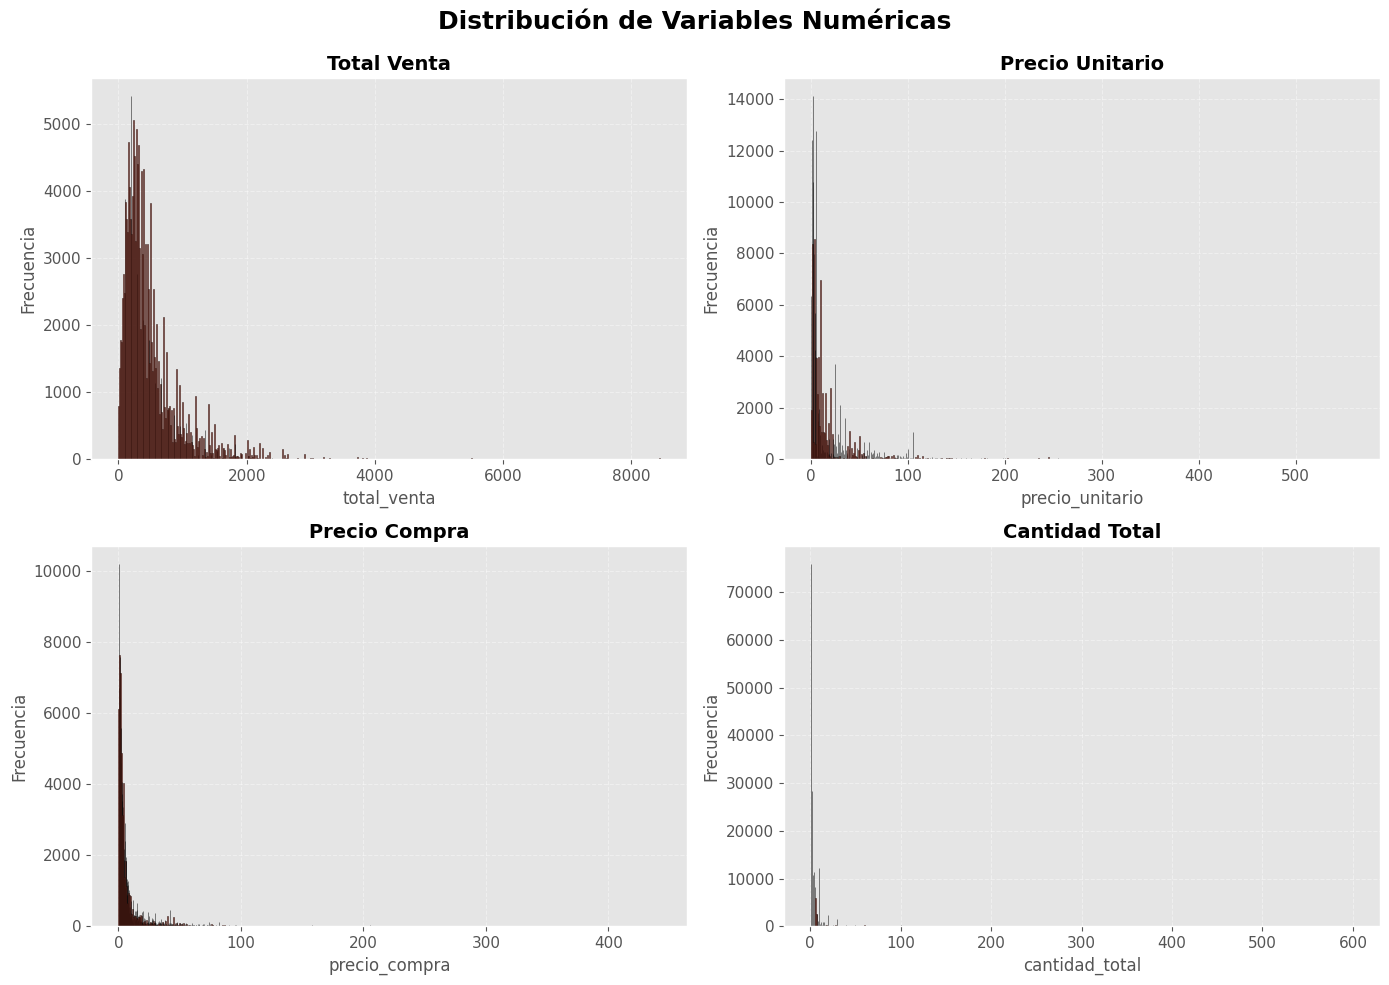

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

columns = ['total_venta', 'precio_unitario', 'precio_compra', 'cantidad_total']
titles = ['Total Venta', 'Precio Unitario', 'Precio Compra', 'Cantidad Total']

for i, ax in enumerate(axes.flat):
    ax.hist(
        df[columns[i]],
        bins='auto',
        color='C0',
        alpha=0.85,
        edgecolor='black',
        linewidth=0.4
    )
    
    ax.set_title(titles[i], fontsize=14, fontweight='bold')
    ax.set_xlabel(columns[i], fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Distribución de Variables Numéricas", fontsize=18, fontweight='bold')
plt.show()


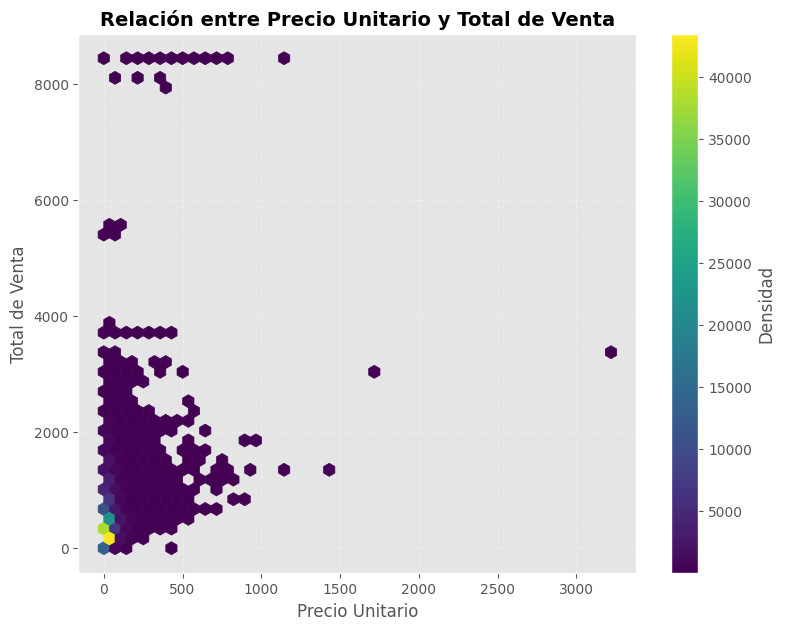

In [21]:
plt.figure(figsize=(9, 7))

plt.hexbin(
    df['total_unitario'],
    df['total_venta'],
    gridsize=45,
    cmap='viridis',
    mincnt=1
)

plt.colorbar(label='Densidad')
plt.title('Relación entre Precio Unitario y Total de Venta', fontsize=14, fontweight='bold')
plt.xlabel('Precio Unitario', fontsize=12)
plt.ylabel('Total de Venta', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


In [22]:
# Asegurarnos que fecha sea datetime
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

df['dia'] = df['fecha'].dt.day
df['mes'] = df['fecha'].dt.month
df['año'] = df['fecha'].dt.year
df['nombre_dia'] = df['fecha'].dt.day_name()


In [23]:
# Demanda anual
venta_anual = df.groupby('año')['cantidad_total'].sum()


In [24]:
df['nombre_mes'] = df['fecha'].dt.month_name()

venta_mensual = df.groupby('nombre_mes')['cantidad_total'].sum()
# Reordenar de enero a diciembre
orden_meses = ['January','February','March','April','May','June','July','August','September','October','November','December']
venta_mensual = venta_mensual.reindex(orden_meses)


In [25]:
ventas_por_dia = df.groupby('nombre_dia')['cantidad_total'].sum()

# Reordenar los días de la semana de lunes a domingo
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia = ventas_por_dia.reindex(orden_dias)

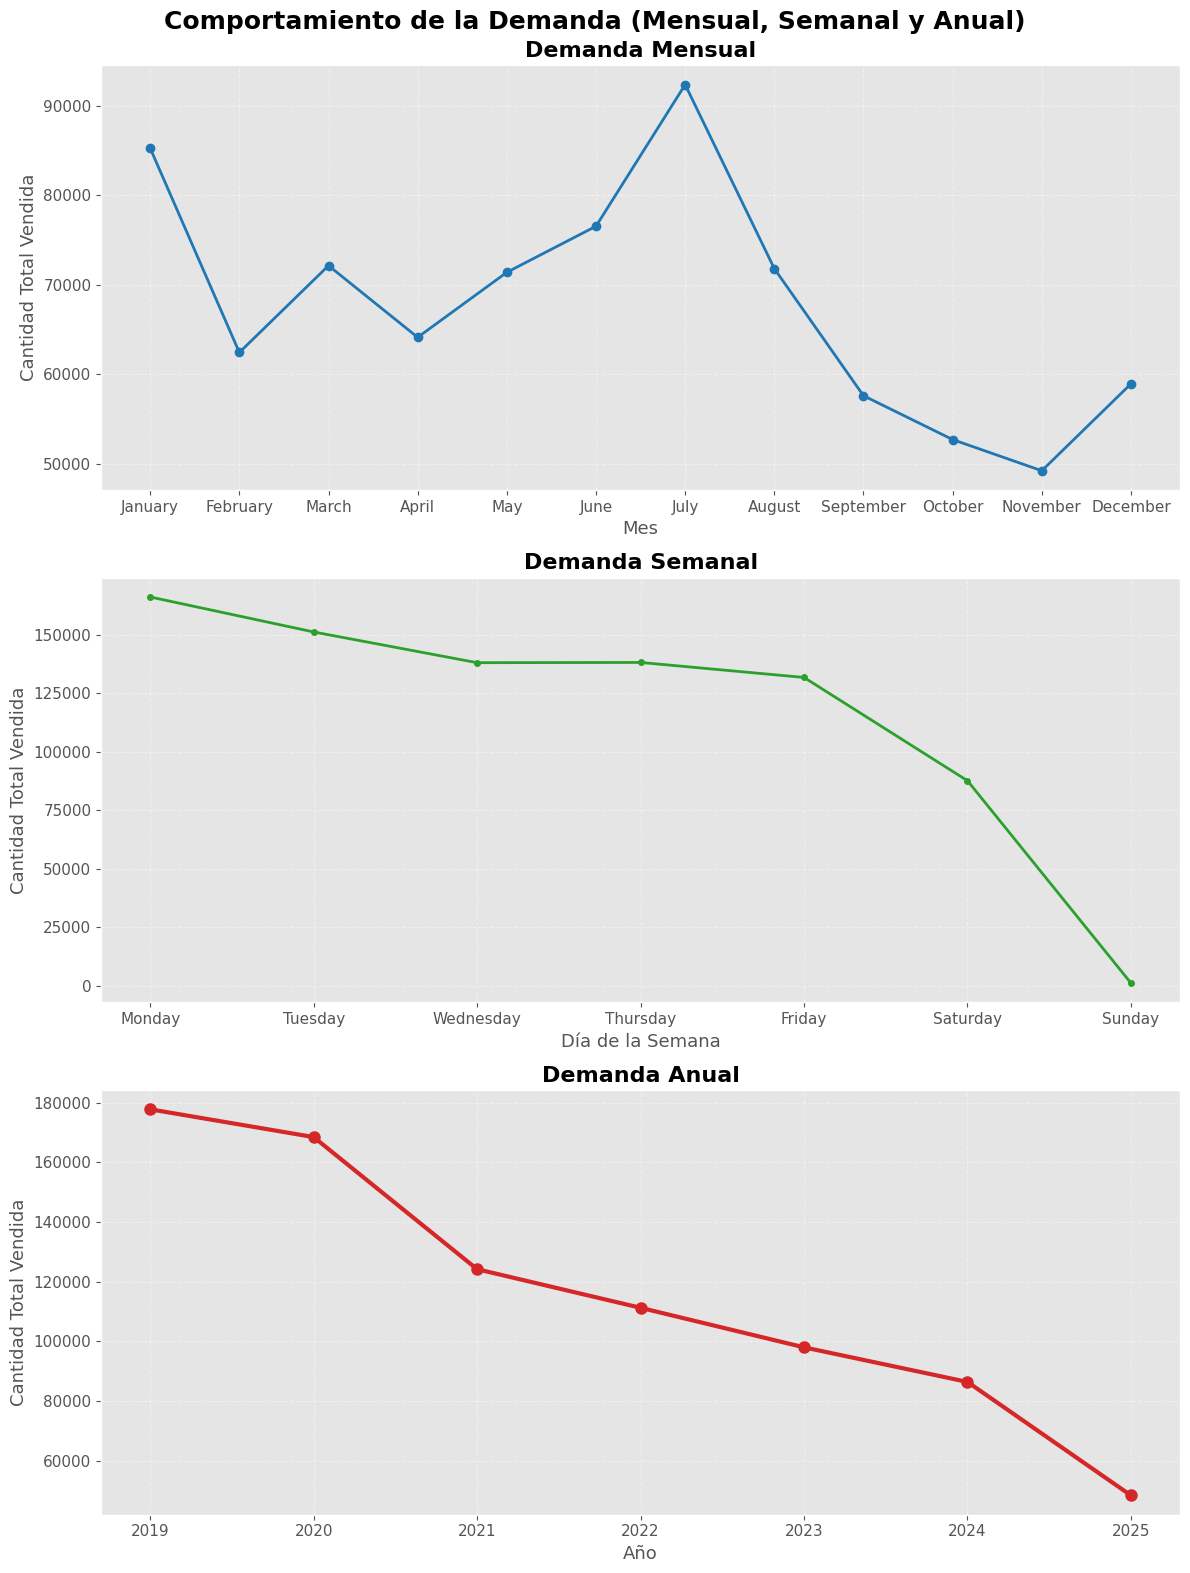

In [26]:
import matplotlib.pyplot as plt

# Configuración de la paleta de colores
colors = ['#1f77b4', '#2ca02c', '#d62728']  # azul, verde, rojo suaves

# Crear los gráficos en subgráficos
fig, axes = plt.subplots(3, 1, figsize=(12, 16))

# 1. Demanda mensual
axes[0].plot(
    venta_mensual.index,
    venta_mensual.values,
    marker='o',
    markersize=6,
    linewidth=2,
    color=colors[0]
)
axes[0].set_title('Demanda Mensual', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Mes', fontsize=13)
axes[0].set_ylabel('Cantidad Total Vendida', fontsize=13)
axes[0].grid(True, linestyle='--', alpha=0.4)
axes[0].tick_params(axis='both', labelsize=11)

# 2. Demanda semanal (por día de la semana)
axes[1].plot(
    ventas_por_dia.index,
    ventas_por_dia.values,
    marker='o',
    markersize=4,
    linewidth=2,
    color=colors[1]
)
axes[1].set_title('Demanda Semanal', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Día de la Semana', fontsize=13)
axes[1].set_ylabel('Cantidad Total Vendida', fontsize=13)
axes[1].grid(True, linestyle='--', alpha=0.4)
axes[1].tick_params(axis='both', labelsize=11)

# 3. Demanda anual
axes[2].plot(
    venta_anual.index,
    venta_anual.values,
    marker='o',
    markersize=8,
    linewidth=3,
    color=colors[2]
)
axes[2].set_title('Demanda Anual', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Año', fontsize=13)
axes[2].set_ylabel('Cantidad Total Vendida', fontsize=13)
axes[2].grid(True, linestyle='--', alpha=0.4)
axes[2].tick_params(axis='both', labelsize=11)

# Ajustes de diseño
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Comportamiento de la Demanda (Mensual, Semanal y Anual)', fontsize=18, fontweight='bold')

# Mostrar los gráficos
plt.show()


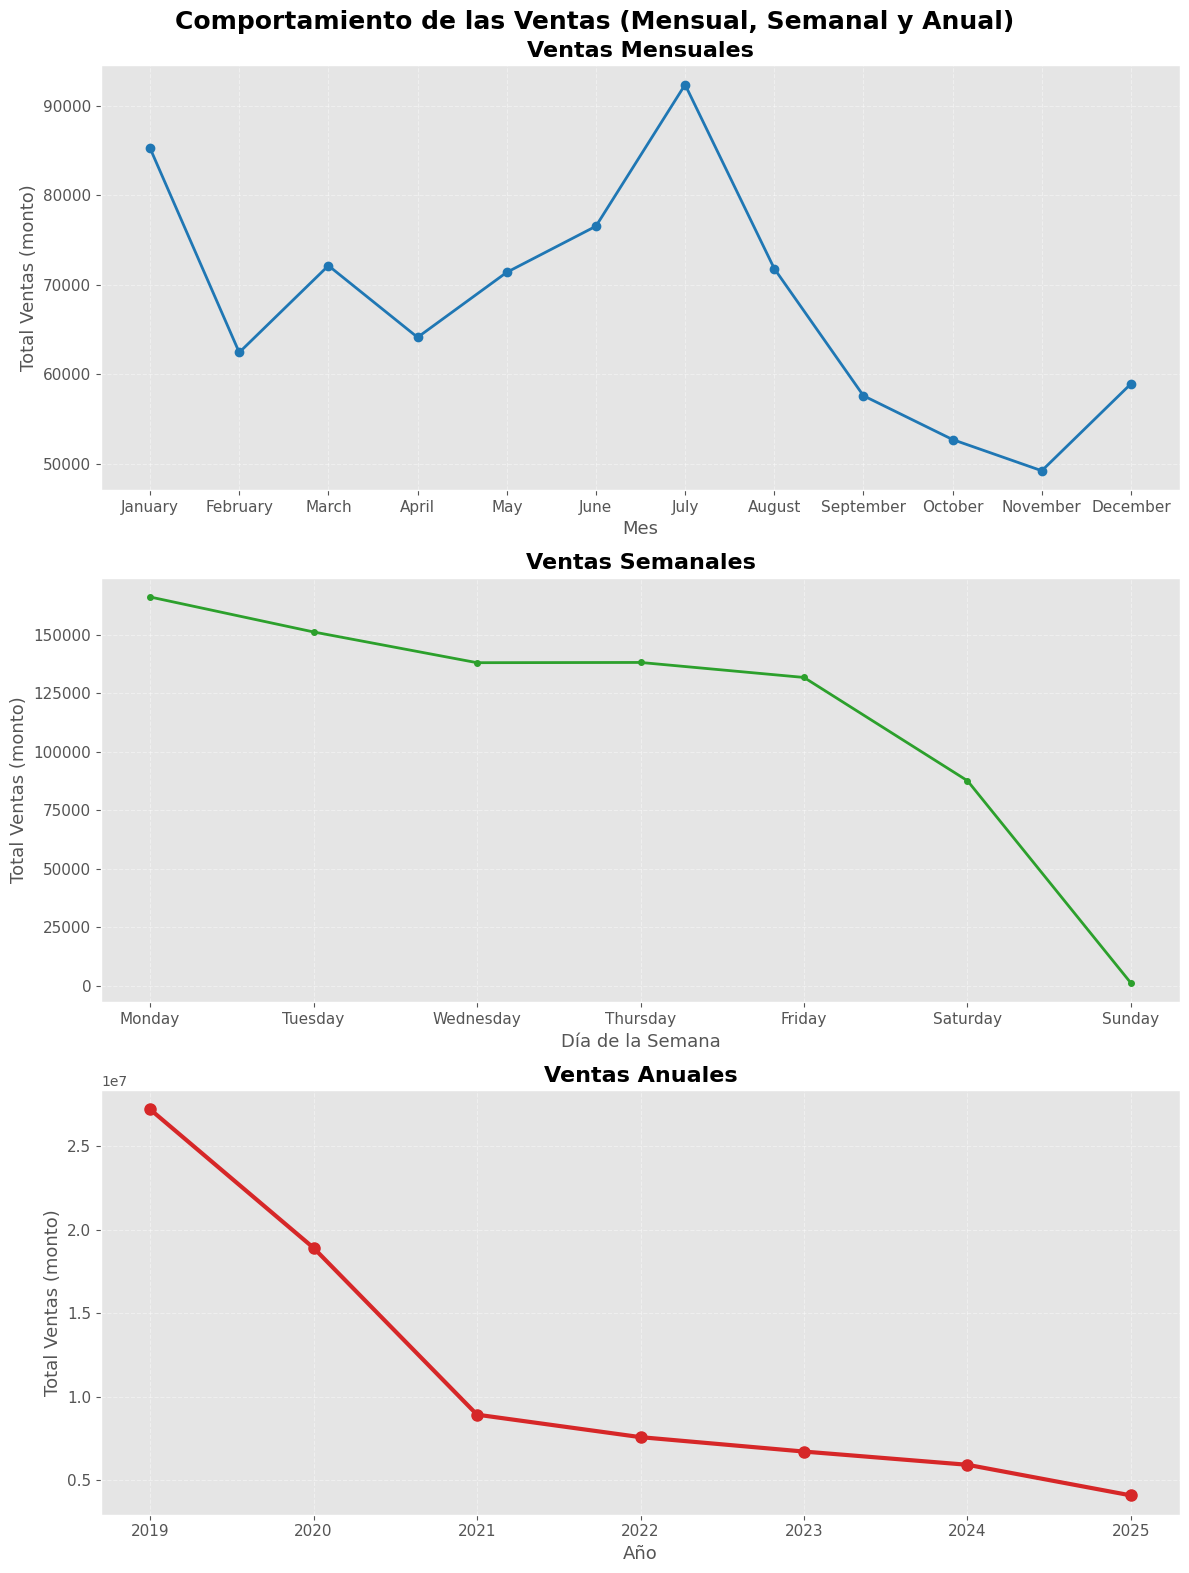

In [27]:

# ============================
# Ventas por día (semanal)
# ============================
df['nombre_dia'] = df['fecha'].dt.day_name()
ventas_por_dia_t = df.groupby(['nombre_dia', 'id_venta'])['total_venta'].sum().reset_index()
ventas_por_dia_t = ventas_por_dia_t.groupby('nombre_dia')['total_venta'].sum()
# Orden de los días
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_por_dia_t = ventas_por_dia_t.reindex(orden_dias)

# ============================
# Ventas por mes (mensual)
# ============================
venta_mensual_t = df.groupby('nombre_mes')['total_venta'].sum()
venta_mensual_t = venta_mensual_t.reindex(orden_meses)

# ============================
# Ventas por año (anual)
# ============================
df['año'] = df['fecha'].dt.year
venta_anual = df.groupby(['año', 'id_venta'])['total_venta'].sum().reset_index()
venta_anual = venta_anual.groupby('año')['total_venta'].sum()

# ============================
# Gráficos en subplots
# ============================
colors = ['#1f77b4', '#2ca02c', '#d62728']  # azul, verde, rojo suaves
fig, axes = plt.subplots(3, 1, figsize=(12, 16))

# 1. Ventas mensuales
axes[0].plot(
    venta_mensual.index.astype(str),
    venta_mensual.values,
    marker='o',
    markersize=6,
    linewidth=2,
    color=colors[0]
)
axes[0].set_title('Ventas Mensuales', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Mes', fontsize=13)
axes[0].set_ylabel('Total Ventas (monto)', fontsize=13)
axes[0].grid(True, linestyle='--', alpha=0.4)
axes[0].tick_params(axis='both', labelsize=11)

# 2. Ventas semanales (por día de la semana)
axes[1].plot(
    ventas_por_dia.index,
    ventas_por_dia.values,
    marker='o',
    markersize=4,
    linewidth=2,
    color=colors[1]
)
axes[1].set_title('Ventas Semanales', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Día de la Semana', fontsize=13)
axes[1].set_ylabel('Total Ventas (monto)', fontsize=13)
axes[1].grid(True, linestyle='--', alpha=0.4)
axes[1].tick_params(axis='both', labelsize=11)

# 3. Ventas anuales
axes[2].plot(
    venta_anual.index,
    venta_anual.values,
    marker='o',
    markersize=8,
    linewidth=3,
    color=colors[2]
)
axes[2].set_title('Ventas Anuales', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Año', fontsize=13)
axes[2].set_ylabel('Total Ventas (monto)', fontsize=13)
axes[2].grid(True, linestyle='--', alpha=0.4)
axes[2].tick_params(axis='both', labelsize=11)

# Ajustes de diseño
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle('Comportamiento de las Ventas (Mensual, Semanal y Anual)', fontsize=18, fontweight='bold')

# Mostrar gráficos
plt.show()


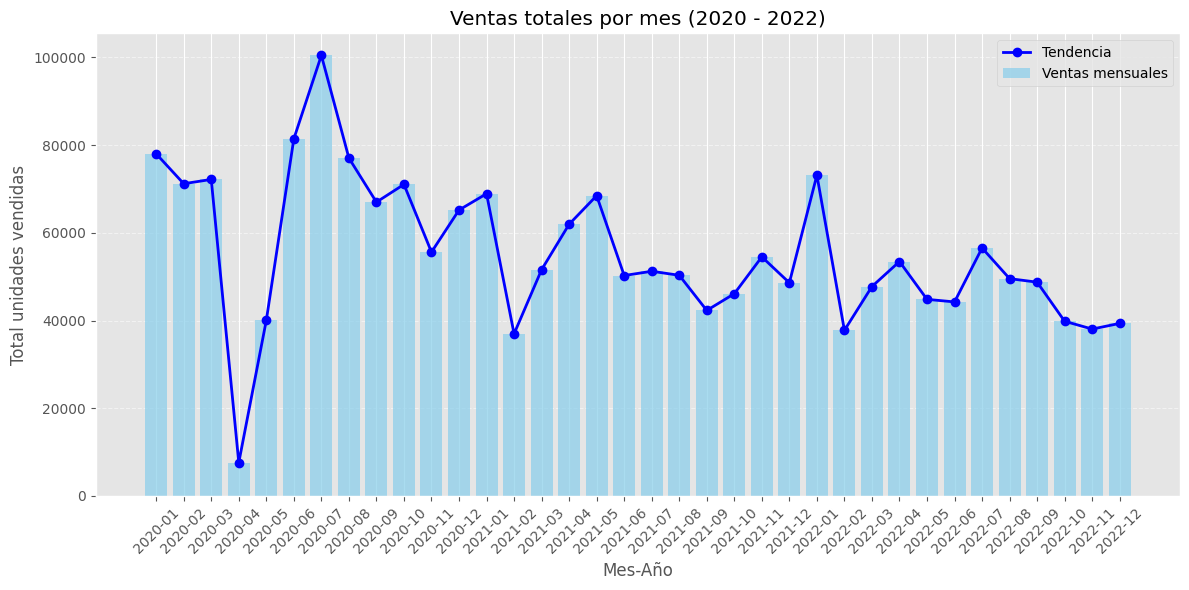

In [28]:
df_pandemia = df[df['fecha'].dt.year.isin([2020, 2021, 2022])]
df_pandemia['mes_ano'] = df_pandemia['fecha'].dt.to_period('M')
ventas_mensuales = df_pandemia.groupby('mes_ano')['total_unitario'].sum()

# ===========================
# Gráfico de ventas mensuales
# ===========================
plt.figure(figsize=(12,6))

# Barras
plt.bar(ventas_mensuales.index.astype(str), ventas_mensuales, color='skyblue', alpha=0.7, label='Ventas mensuales')

# Línea
plt.plot(ventas_mensuales.index.astype(str), ventas_mensuales, color='blue', marker='o', linewidth=2, label='Tendencia')

plt.title('Ventas totales por mes (2020 - 2022)')
plt.xlabel('Mes-Año')
plt.ylabel('Total unidades vendidas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

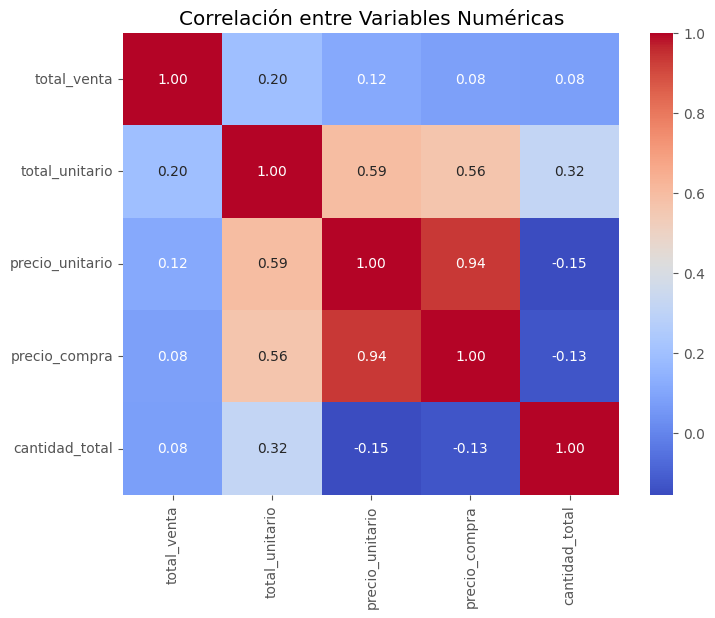

In [29]:
# Correlación entre variables numéricas
correlation_matrix = df[['total_venta', 'total_unitario', 'precio_unitario', 'precio_compra', 'cantidad_total']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlación entre Variables Numéricas")
plt.show()
